In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [23]:
with open("optim_param/optim_DNN_1_params.json", "r") as f:
    DNN_1_params = json.load(f)

with open("optim_param/optim_DNN_2_params.json", "r") as f:
    DNN_2_params = json.load(f)

with open("optim_param/optim_DNN_3_params.json", "r") as f:
    DNN_3_params = json.load(f)

with open("optim_param/optim_DNN_4_params.json", "r") as f:
    DNN_4_params = json.load(f)

with open("optim_param/optim_DNN_5_params.json", "r") as f:
    DNN_5_params = json.load(f)

with open("optim_param/optim_DNN_6_params.json", "r") as f:
    DNN_6_params = json.load(f)

with open("optim_param/optim_DNN_7_params.json", "r") as f:
    DNN_7_params = json.load(f)

with open("optim_param/optim_ResNet_params.json", "r") as f:
    ResNet_params = json.load(f)

with open("optim_param/optim_FTTansformer_params.json", "r") as f:
    FTTransformer_params = json.load(f)

In [24]:
class DNN_1(nn.Module):
    def __init__(self, input_dim, dropout_rate=DNN_1_params["dropout"]):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.layer2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.layer3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.layer4 = nn.Linear(8, 4)
        self.bn4 = nn.BatchNorm1d(4)
        self.output_layer = nn.Linear(4, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))  
        x = self.dropout(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn3(self.layer3(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn4(self.layer4(x))) 
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [25]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"],dropout3=DNN_2_params["dropout3"],dropout4=DNN_2_params["dropout4"]):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16,8)
        self.layer4 = nn.Linear(8,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [26]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_3_params["dropout1"],dropout2=DNN_3_params["dropout2"]):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [27]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_4_params["dropout1"],dropout2=DNN_4_params["dropout2"]):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [28]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_5_params["dropout1"],dropout2=DNN_5_params["dropout2"]):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [29]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_6_params["dropout1"],dropout2=DNN_6_params["dropout2"]):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [30]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_7_params["dropout1"],dropout2=DNN_7_params["dropout2"]):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [31]:
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=1, embed_dim=FTTransformer_params["embed_dim"], num_heads=FTTransformer_params["num_heads"], num_layers=FTTransformer_params["num_layers"], dropout=FTTransformer_params["dropout"]):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.embedding_dropout = nn.Dropout(dropout)  # 埋め込み層後のDropout
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.output_dropout = nn.Dropout(dropout)  # 出力層前のDropout

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)  # Dropoutを埋め込み層後に適用
        x = x.unsqueeze(1)  # [batch_size, 1, embed_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)  # 平均プーリング
        x = self.output_dropout(x)  # Dropoutを適用
        x = self.fc(x)
        x = torch.sigmoid(x)  # 2値分類用のシグモイド活性化
        return x


In [32]:
class ResidualBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim,dropout1,dropout2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1=nn.Dropout(dropout1)
        
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.bn2 = nn.BatchNorm1d(input_dim)
        self.dropout2=nn.Dropout(dropout2)

    def forward(self, x):
        residual = x  # 入力を保存 (ショートカット)
        out = torch.relu(self.bn1(self.fc1(x)))
        out=self.dropout1(out)

        out = self.bn2(self.fc2(out))
        out=self.dropout2(out)

        out += residual  # ショートカット接続
        return torch.relu(out)


In [33]:
class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, num_blocks=ResNet_params["num_blocks"], hidden_dim=ResNet_params["hidden_dim"], dropout1=ResNet_params["dropout1"], dropout2=ResNet_params["dropout2"]):
        super(ResNetBinaryClassifier, self).__init__()
        self.blocks = nn.Sequential(
            *[ResidualBlock(input_dim, hidden_dim, dropout1, dropout2) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(input_dim, 1)  # 出力層

    def forward(self, x):
        x = self.blocks(x)
        x = torch.sigmoid(self.output_layer(x))  # 2値分類用シグモイド
        return x

In [34]:
df=pd.read_csv('learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [35]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "model_params/DNN_1.pth",
    "model_params/DNN_2.pth",
    "model_params/DNN_3.pth",
    "model_params/DNN_4.pth",
    "model_params/DNN_5.pth",
    "model_params/DNN_6.pth",
    "model_params/DNN_7.pth",
    "model_params/FTTransformer.pth",
    "model_params/ResNet.pth",
    ]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 4: DNN_5,
                 5: DNN_6,
                 6: DNN_7,
                 7:FTTransformer,
                 8:ResNetBinaryClassifier
                 }

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

/tmp/ipykernel_42869/1801429464.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))
/home/gonken/anaconda3/envs

In [36]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 9])
Test DL Features Shape: torch.Size([878, 9])


In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=0)

In [38]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_val_tensor=torch.tensor(X_val, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [39]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)

In [40]:
class meta_model(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"]):
        super(meta_model, self).__init__()
        self.layer1 = nn.Linear(input_dim,16)
        self.layer2 = nn.Linear(16,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(16)
        self.bn2=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [41]:
def objective(trial):
    # ハイパーパラメータのサンプリング
    dropout1 = trial.suggest_float("dropout1", 0, 0.5, step=0.05)
    dropout2 = trial.suggest_float("dropout2", 0, 0.5, step=0.05)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
    weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
    

    # モデル定義
    model = meta_model(
        input_dim=X_train_tensor.shape[1],
        dropout1=dropout1,
        dropout2=dropout2
    ).to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

    # Early Stoppingの設定
    patience = 10
    best_val_loss = float('inf')
    patience_counter = 0

    # 訓練ループ
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.squeeze())
            loss.backward()
            optimizer.step()

        # バリデーション評価
        model.eval()
        val_loss = 0
        val_true, val_pred = [], []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss += criterion(val_outputs, y_val.squeeze()).item()
                predictions = (val_outputs >=0.5).float()  
                val_true.extend(y_val.cpu().numpy())
                val_pred.extend(predictions.cpu().numpy())

        val_loss /= len(val_loader)

        # Early Stopping判定
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Optunaへのログ
        trial.report(val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # 評価指標の計算
    mcc = matthews_corrcoef(val_true, val_pred)
    print(f"Final MCC: {mcc:.4f}")

    return mcc  # mccを返す


In [42]:
device_id = 1
torch.cuda.set_device(device_id)
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# Optunaの設定
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=100)

# 結果表示
print("Best Parameters: ", study.best_params)
print("Best Validation F1: ", study.best_value)

[I 2024-12-18 14:08:09,072] A new study created in memory with name: no-name-79255289-3d84-4252-bfdc-693d4b7a1017
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:10,911] Trial 0 finished with value: 0.0 and parameters: {'dropout1': 0.4, 'dropout2': 0.1, 'learning_rate': 0.022657559585572615, 'weight_decay': 0.016798809999091214}. Best is trial 0 with value: 0.0.


Early stopping at epoch 17
Final MCC: 0.0000


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:12,081] Trial 1 finished with value: 0.0 and parameters: {'dropout1': 0.2, 'dropout2': 0.0, 'learning_rate': 0.008352587702896588, 'weight_decay': 0.08603026058507796}. Best is trial 0 with value: 0.0.


Early stopping at epoch 12
Final MCC: 0.0000


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:21,999] Trial 2 finished with value: 0.11131873390823191 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.4, 'learning_rate': 0.0004363432626256847, 'weight_decay': 0.0059572740614312735}. Best is trial 2 with value: 0.11131873390823191.


Final MCC: 0.1113


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:25,663] Trial 3 finished with value: 0.12143639348227671 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.15000000000000002, 'learning_rate': 0.0033102837982924007, 'weight_decay': 0.010579102918445512}. Best is trial 3 with value: 0.12143639348227671.


Early stopping at epoch 33
Final MCC: 0.1214


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:36,561] Trial 4 finished with value: -0.018903319276908553 and parameters: {'dropout1': 0.25, 'dropout2': 0.25, 'learning_rate': 0.00010622892831258694, 'weight_decay': 0.035288083486714486}. Best is trial 3 with value: 0.12143639348227671.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

Final MCC: -0.0189


[I 2024-12-18 14:08:47,049] Trial 6 finished with value: 0.30229535759890275 and parameters: {'dropout1': 0.2, 'dropout2': 0.30000000000000004, 'learning_rate': 0.00020070132779300443, 'weight_decay': 0.0009671721390076575}. Best is trial 6 with value: 0.30229535759890275.


Final MCC: 0.3023


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:53,803] Trial 7 finished with value: 0.11765148915921306 and parameters: {'dropout1': 0.45, 'dropout2': 0.1, 'learning_rate': 0.0012777222818529954, 'weight_decay': 0.00963216941462049}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

Early stopping at epoch 63
Final MCC: 0.1177


[I 2024-12-18 14:08:54,033] Trial 9 pruned. 
[I 2024-12-18 14:08:54,161] Trial 10 pruned. 
[I 2024-12-18 14:08:54,285] Trial 11 pruned. 
[I 2024-12-18 14:08:54,408] Trial 12 pruned. 
[I 2024-12-18 14:09:03,013] Trial 13 finished with value: 0.2245414332443818 and parameters: {'dropout1': 0.05, 'dropout2': 0.2, 'learning_rate': 0.00052605342242859, 'weight_decay': 0.00018872638781430653}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  

Early stopping at epoch 83
Final MCC: 0.2245


[I 2024-12-18 14:09:03,256] Trial 15 pruned. 
[I 2024-12-18 14:09:06,706] Trial 16 finished with value: 0.10615481083641774 and parameters: {'dropout1': 0.1, 'dropout2': 0.5, 'learning_rate': 0.0010260705841290602, 'weight_decay': 0.00046761699746420554}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:06,829] Trial 17 pruned. 


Early stopping at epoch 33
Final MCC: 0.1062


[I 2024-12-18 14:09:06,939] Trial 18 pruned. 
[I 2024-12-18 14:09:07,051] Trial 19 pruned. 
[I 2024-12-18 14:09:07,172] Trial 20 pruned. 
[I 2024-12-18 14:09:12,780] Trial 21 finished with value: 0.13258544231582267 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.2, 'learning_rate': 0.0020656542581238024, 'weight_decay': 0.018058142482566875}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_lo

Early stopping at epoch 50
Final MCC: 0.1326


[I 2024-12-18 14:09:13,034] Trial 23 pruned. 
[I 2024-12-18 14:09:23,535] Trial 24 finished with value: 0.1264965079231856 and parameters: {'dropout1': 0.1, 'dropout2': 0.30000000000000004, 'learning_rate': 0.00021400729673068093, 'weight_decay': 0.001354798587807026}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:23,661] Trial 25 pruned. 


Final MCC: 0.1265


[I 2024-12-18 14:09:23,784] Trial 26 pruned. 
[I 2024-12-18 14:09:23,902] Trial 27 pruned. 
[I 2024-12-18 14:09:24,020] Trial 28 pruned. 
[I 2024-12-18 14:09:24,138] Trial 29 pruned. 
[I 2024-12-18 14:09:24,261] Trial 30 pruned. 
[I 2024-12-18 14:09:35,007] Trial 31 finished with value: -0.02544593845891862 and parameters: {'dropout1': 0.1, 'dropout2': 0.30000000000000004, 'learning_rate': 0.00018991477769858452, 'weight_decay': 0.0016125245036282593}. Best is trial 6 with value: 0.30229535759890275.


Final MCC: -0.0254


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:43,600] Trial 32 finished with value: 0.09822692941903015 and parameters: {'dropout1': 0.05, 'dropout2': 0.25, 'learning_rate': 0.0003007296680628331, 'weight_decay': 0.001031249054812205}. Best is trial 6 with value: 0.30229535759890275.


Final MCC: 0.0982


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:51,816] Trial 33 finished with value: 0.27986259142336767 and parameters: {'dropout1': 0.1, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0005144286680306695, 'weight_decay': 0.001536215098332318}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

Early stopping at epoch 76
Final MCC: 0.2799


[I 2024-12-18 14:09:52,034] Trial 35 pruned. 
[I 2024-12-18 14:10:01,050] Trial 36 finished with value: 0.13091495913970802 and parameters: {'dropout1': 0.2, 'dropout2': 0.35000000000000003, 'learning_rate': 0.0008289330081850095, 'weight_decay': 0.00047977435293144723}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:10:01,175] Trial 37 pruned. 


Early stopping at epoch 83
Final MCC: 0.1309


[I 2024-12-18 14:10:01,299] Trial 38 pruned. 
[I 2024-12-18 14:10:01,401] Trial 39 pruned. 
[I 2024-12-18 14:10:01,507] Trial 40 pruned. 
[I 2024-12-18 14:10:01,621] Trial 41 pruned. 
[I 2024-12-18 14:10:01,737] Trial 42 pruned. 
[I 2024-12-18 14:10:01,827] Trial 43 pruned. 
[I 2024-12-18 14:10:06,519] Trial 44 finished with value: 0.14571870503829365 and parameters: {'dropout1': 0.25, 'dropout2': 0.45, 'learning_rate': 0.0025798956685683136, 'weight_decay': 0.0001686965943817782}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Early stopping at epoch 50
Final MCC: 0.1457


[I 2024-12-18 14:10:06,775] Trial 46 pruned. 
[I 2024-12-18 14:10:06,882] Trial 47 pruned. 
[I 2024-12-18 14:10:06,980] Trial 48 pruned. 
[I 2024-12-18 14:10:07,075] Trial 49 pruned. 
[I 2024-12-18 14:10:07,171] Trial 50 pruned. 
[I 2024-12-18 14:10:07,268] Trial 51 pruned. 
[I 2024-12-18 14:10:07,356] Trial 52 pruned. 
[I 2024-12-18 14:10:07,455] Trial 53 pruned. 
[I 2024-12-18 14:10:12,421] Trial 54 finished with value: 0.22775241260906298 and parameters: {'dropout1': 0.1, 'dropout2': 0.35000000000000003, 'learning_rate': 0.0014075522805081547, 'weight_decay': 0.00013956177353581352}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: Futu

Early stopping at epoch 49
Final MCC: 0.2278


[I 2024-12-18 14:10:12,682] Trial 57 pruned. 
[I 2024-12-18 14:10:12,795] Trial 58 pruned. 
[I 2024-12-18 14:10:12,918] Trial 59 pruned. 
[I 2024-12-18 14:10:13,040] Trial 60 pruned. 
[I 2024-12-18 14:10:13,168] Trial 61 pruned. 
[I 2024-12-18 14:10:13,289] Trial 62 pruned. 
[I 2024-12-18 14:10:13,410] Trial 63 pruned. 
[I 2024-12-18 14:10:13,536] Trial 64 pruned. 
[I 2024-12-18 14:10:13,664] Trial 65 pruned. 
[I 2024-12-18 14:10:13,788] Trial 66 pruned. 
[I 2024-12-18 14:10:13,909] Trial 67 pruned. 
[I 2024-12-18 14:10:17,014] Trial 68 finished with value: 0.17202530168019592 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0018759405409008937, 'weight_decay': 0.0008956029455812497}. Best is trial 6 with value: 0.30229535759890275.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

Early stopping at epoch 32
Final MCC: 0.1720


[I 2024-12-18 14:10:17,277] Trial 71 pruned. 
[I 2024-12-18 14:10:17,362] Trial 72 pruned. 
[I 2024-12-18 14:10:17,446] Trial 73 pruned. 
[I 2024-12-18 14:10:17,532] Trial 74 pruned. 
[I 2024-12-18 14:10:17,616] Trial 75 pruned. 
[I 2024-12-18 14:10:17,700] Trial 76 pruned. 
[I 2024-12-18 14:10:17,785] Trial 77 pruned. 
[I 2024-12-18 14:10:17,870] Trial 78 pruned. 
[I 2024-12-18 14:10:17,954] Trial 79 pruned. 
[I 2024-12-18 14:10:18,039] Trial 80 pruned. 
[I 2024-12-18 14:10:18,124] Trial 81 pruned. 
[I 2024-12-18 14:10:18,209] Trial 82 pruned. 
[I 2024-12-18 14:10:25,817] Trial 83 finished with value: 0.3067824844174605 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.35000000000000003, 'learning_rate': 0.00018367923714872187, 'weight_decay': 0.0009614092935899386}. Best is trial 83 with value: 0.3067824844174605.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

Final MCC: 0.3068


[I 2024-12-18 14:10:36,080] Trial 85 finished with value: 0.12802902367616784 and parameters: {'dropout1': 0.2, 'dropout2': 0.35000000000000003, 'learning_rate': 0.0002743891199619204, 'weight_decay': 0.000628730515642074}. Best is trial 83 with value: 0.3067824844174605.


Final MCC: 0.1280


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:10:45,813] Trial 86 finished with value: 0.17171734347308867 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.4, 'learning_rate': 0.00017521685850177774, 'weight_decay': 0.09384203821297518}. Best is trial 83 with value: 0.3067824844174605.


Final MCC: 0.1717


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:10:55,109] Trial 87 finished with value: 0.1424463307517114 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.4, 'learning_rate': 0.00017427360810978046, 'weight_decay': 0.09305071147825955}. Best is trial 83 with value: 0.3067824844174605.


Final MCC: 0.1424


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:11:04,265] Trial 88 finished with value: 0.3441936434225538 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.4, 'learning_rate': 0.0001592758782514425, 'weight_decay': 0.06028380934065914}. Best is trial 88 with value: 0.3441936434225538.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

Final MCC: 0.3442


[I 2024-12-18 14:11:12,977] Trial 90 finished with value: 0.22308674355523242 and parameters: {'dropout1': 0.05, 'dropout2': 0.4, 'learning_rate': 0.00013202406198261967, 'weight_decay': 0.0786005679988337}. Best is trial 88 with value: 0.3441936434225538.


Final MCC: 0.2231


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:11:21,153] Trial 91 finished with value: 0.35626061420705346 and parameters: {'dropout1': 0.05, 'dropout2': 0.4, 'learning_rate': 0.00010900426438914696, 'weight_decay': 0.06860314640031462}. Best is trial 91 with value: 0.35626061420705346.


Final MCC: 0.3563


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:11:30,797] Trial 92 finished with value: 0.3193499472847486 and parameters: {'dropout1': 0.05, 'dropout2': 0.4, 'learning_rate': 0.00010200659120630917, 'weight_decay': 0.06874089117547601}. Best is trial 91 with value: 0.35626061420705346.


Final MCC: 0.3193


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:11:41,214] Trial 93 finished with value: 0.36634673021429376 and parameters: {'dropout1': 0.05, 'dropout2': 0.4, 'learning_rate': 0.00010845328174970751, 'weight_decay': 0.057575132608342905}. Best is trial 93 with value: 0.36634673021429376.


Final MCC: 0.3663


/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_42869/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:11:49,214] Trial 94 finished with value: 0.3025886620115761 and parameters: {'dropout1': 0.05, 'dropout2': 0.4, 'learning_rate': 0.00010258567213355378, 'weight_decay': 0.05494844907637236}. Best is trial 93 with value: 0.36634673021429376.
/tmp/ipykernel_42869/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

Final MCC: 0.3026


[I 2024-12-18 14:11:49,486] Trial 97 pruned. 
[I 2024-12-18 14:11:49,572] Trial 98 pruned. 
[I 2024-12-18 14:11:56,516] Trial 99 finished with value: 0.3528325439547313 and parameters: {'dropout1': 0.05, 'dropout2': 0.4, 'learning_rate': 0.00012366228969332252, 'weight_decay': 0.06402796263499065}. Best is trial 93 with value: 0.36634673021429376.


Final MCC: 0.3528
Best Parameters:  {'dropout1': 0.05, 'dropout2': 0.4, 'learning_rate': 0.00010845328174970751, 'weight_decay': 0.057575132608342905}
Best Validation F1:  0.36634673021429376


In [43]:
best_params = study.best_params

# JSON形式で保存
with open("optim_param/stack_DNN_params.json", "w") as f:
    json.dump(best_params, f)

print("Best parameters saved to 'best_params.json'")

Best parameters saved to 'best_params.json'


Epoch [1/70], Loss: 0.8875
Epoch [1/70], Train Loss: 0.8875, Val Loss: 0.8456
Epoch [2/70], Loss: 0.8741
Epoch [2/70], Train Loss: 0.8741, Val Loss: 0.8648
Epoch [3/70], Loss: 0.8683
Epoch [3/70], Train Loss: 0.8683, Val Loss: 0.8573
Epoch [4/70], Loss: 0.8611
Epoch [4/70], Train Loss: 0.8611, Val Loss: 0.8485
Epoch [5/70], Loss: 0.8489
Epoch [5/70], Train Loss: 0.8489, Val Loss: 0.8417
Epoch [6/70], Loss: 0.8465
Epoch [6/70], Train Loss: 0.8465, Val Loss: 0.8351
Epoch [7/70], Loss: 0.8397
Epoch [7/70], Train Loss: 0.8397, Val Loss: 0.8311
Epoch [8/70], Loss: 0.8276
Epoch [8/70], Train Loss: 0.8276, Val Loss: 0.8279
Epoch [9/70], Loss: 0.8354
Epoch [9/70], Train Loss: 0.8354, Val Loss: 0.8259
Epoch [10/70], Loss: 0.8270
Epoch [10/70], Train Loss: 0.8270, Val Loss: 0.8248
Epoch [11/70], Loss: 0.8265
Epoch [11/70], Train Loss: 0.8265, Val Loss: 0.8202
Epoch [12/70], Loss: 0.8226
Epoch [12/70], Train Loss: 0.8226, Val Loss: 0.8159
Epoch [13/70], Loss: 0.8175
Epoch [13/70], Train Loss: 0.8

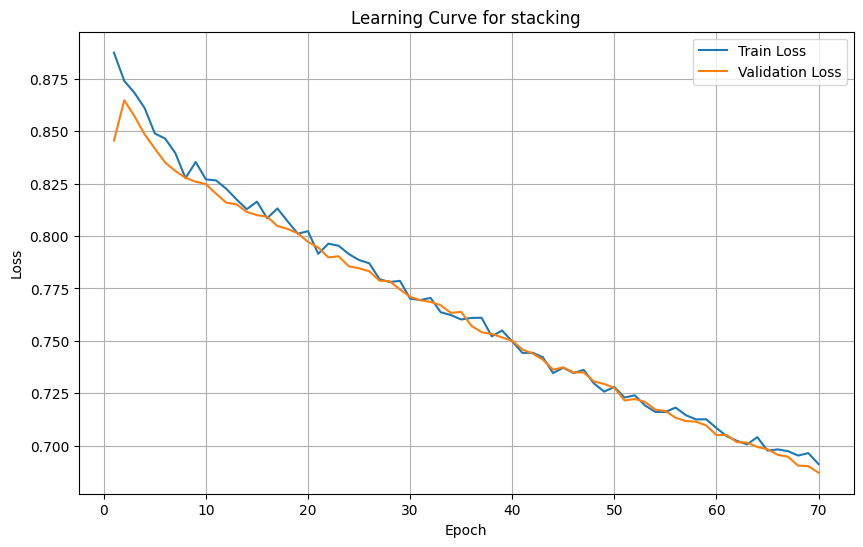

In [51]:
best_params=study.best_params
model = meta_model(input_dim=X_train_tensor.shape[1],
              dropout1=best_params["dropout1"],
              dropout2=best_params["dropout2"]).to(device)
# 最適化と訓練を実行
optimizer = optim.Adam(model.parameters(), lr=best_params["learning_rate"],weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

num_epochs=70
train_losses = []
val_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if val_loader is not None:
        model.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val.squeeze())
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        model.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for stacking')
plt.legend()
plt.grid()
plt.show()

Accuracy: 58.20%
Precision: 0.4704
Recall: 0.9725
F1 Score: 0.6341
Matthews Correlation Coefficient: 0.3707
Specificity: 0.3503


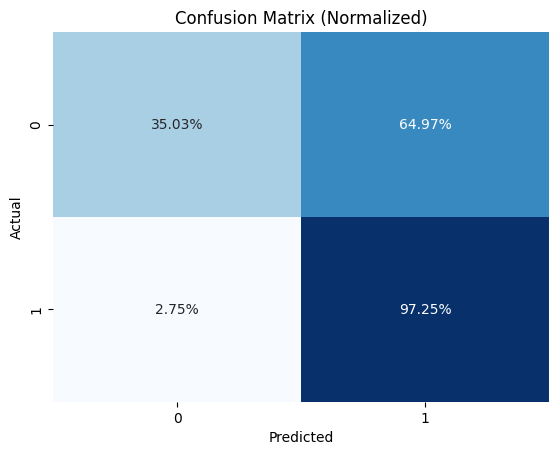

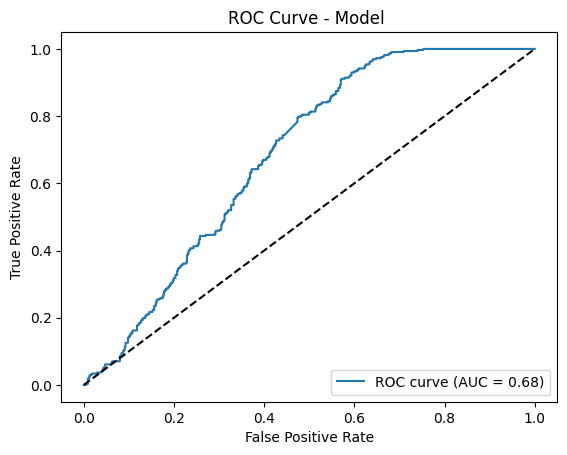

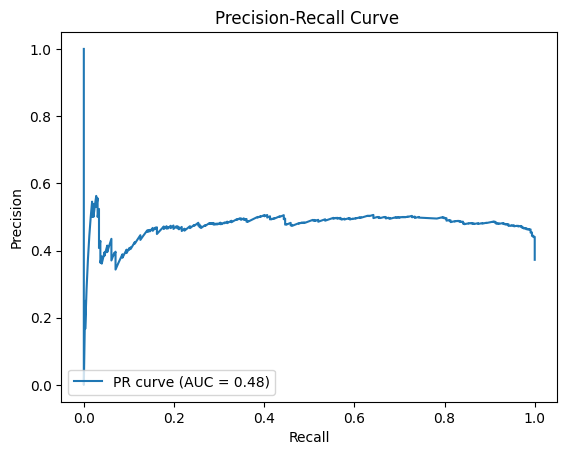

In [52]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # 予測と確率
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs >=0.5).float()
    y_true = y_test_tensor.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    y_prob = test_outputs.cpu().numpy()

# 評価指標
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Matthews Correlation Coefficient: {mcc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # 混同行列（割合表示）
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Normalized)")
    plt.show()

    # ROC曲線とAUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model ')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall曲線
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ')
    plt.legend(loc="lower left")
    plt.show()    

In [53]:
torch.save(model.state_dict(), 'model_params/stack_model_DNN.pth')